# Table of Contents
1. [Data Preprocessing](#1)
2. [Converting Data](#2)
3. [PCA](#3)
4. [Setting up Train and Test Data](#4)
5. [Models](#5)
6. [Model Comparison](#6)
7. [Question Responses](#7)

## 0.0 Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
uw = pd.read_csv('Justin-TRAIN.csv', sep=',', index_col='ID')
uw.head(5)

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,StateOfResidence,Connectivity,FeatureA,FeatureB,FeatureC,FeatureD,FeatureE,FeatureF,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
ID,,,,,,,,,,,,,,,,,,,,
Justin1-14602,Female,0,No,Yes,35,Yes,MO,No,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,One year,Yes,Credit card (automatic),20.10,644.5,No
Justin2-14367,Male,0,Yes,No,3,No,MO,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.00,78.25,No
Justin3-13512,Female,0,Yes,No,5,Yes,IL,DSL,No,No,Yes,Yes,Yes,No,Month-to-month,No,Bank transfer (automatic),67.95,350.3,Yes
Justin4-19444,Male,0,No,No,32,Yes,IL,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),80.35,2596.15,Yes
Justin5-16483,Male,0,No,No,17,Yes,MO,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),55.50,934.15,No


# 1.0 Data Preprocessing <a name="1"></a>

## 1.1 Read data columns, shape, and info

In [3]:
print(uw.columns)
print(uw.shape)
print(uw.info())

Index(['gender', 'Management', 'USAcitizen', 'Married', 'MonthsInUnion',
       'ContinuingEd', 'StateOfResidence', 'Connectivity', 'FeatureA',
       'FeatureB', 'FeatureC', 'FeatureD', 'FeatureE', 'FeatureF',
       'DuesFrequency', 'PaperlessBilling', 'PaymentMethod', 'MonthlyDues',
       'TotalDues', 'LeftUnion'],
      dtype='object')
(2999, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, Justin1-14602 to Justin2999-14399
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2999 non-null   object 
 1   Management        2999 non-null   int64  
 2   USAcitizen        2999 non-null   object 
 3   Married           2999 non-null   object 
 4   MonthsInUnion     2999 non-null   int64  
 5   ContinuingEd      2999 non-null   object 
 6   StateOfResidence  2999 non-null   object 
 7   Connectivity      2999 non-null   object 
 8   FeatureA          2999 non-null   object 
 9 

## 1.2 Notice TotalDues isn't included and is listed as an object. Let's fix that.

In [4]:
#Change TotalDues to a number
uw['TotalDues'] = uw['TotalDues'].apply(pd.to_numeric, errors='coerce')
uw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, Justin1-14602 to Justin2999-14399
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2999 non-null   object 
 1   Management        2999 non-null   int64  
 2   USAcitizen        2999 non-null   object 
 3   Married           2999 non-null   object 
 4   MonthsInUnion     2999 non-null   int64  
 5   ContinuingEd      2999 non-null   object 
 6   StateOfResidence  2999 non-null   object 
 7   Connectivity      2999 non-null   object 
 8   FeatureA          2999 non-null   object 
 9   FeatureB          2999 non-null   object 
 10  FeatureC          2999 non-null   object 
 11  FeatureD          2999 non-null   object 
 12  FeatureE          2999 non-null   object 
 13  FeatureF          2999 non-null   object 
 14  DuesFrequency     2999 non-null   object 
 15  PaperlessBilling  2999 non-null   object 
 16  PaymentMethod     2999 

## 1.3 Check for Null values

In [5]:
#Check for Null values
uw.isnull().sum()

gender              0
Management          0
USAcitizen          0
Married             0
MonthsInUnion       0
ContinuingEd        0
StateOfResidence    0
Connectivity        0
FeatureA            0
FeatureB            0
FeatureC            0
FeatureD            0
FeatureE            0
FeatureF            0
DuesFrequency       0
PaperlessBilling    0
PaymentMethod       0
MonthlyDues         0
TotalDues           4
LeftUnion           0
dtype: int64

In [6]:
#Check for Null Values in Total Dues
uw[uw['TotalDues'].isnull()]

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,StateOfResidence,Connectivity,FeatureA,FeatureB,FeatureC,FeatureD,FeatureE,FeatureF,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
ID,,,,,,,,,,,,,,,,,,,,
Justin1408-13244,Male,0,No,Yes,0,Yes,IL,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
Justin1786-18916,Male,0,Yes,Yes,0,Yes,IL,No,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,Two year,No,Mailed check,25.75,NaN,No
Justin2229-19062,Female,0,Yes,Yes,0,Yes,MO,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
Justin2576-16667,Male,0,Yes,Yes,0,Yes,MO,No,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,Two year,No,Mailed check,19.85,NaN,No


## 1.4 Fix Null Values
### Null values in TotalDues likely because they just joined union. In which case their monthly will equal their total.

In [7]:
uw['TotalDues'].fillna(uw['MonthlyDues'], inplace = True)
uw.isnull().sum()

gender              0
Management          0
USAcitizen          0
Married             0
MonthsInUnion       0
ContinuingEd        0
StateOfResidence    0
Connectivity        0
FeatureA            0
FeatureB            0
FeatureC            0
FeatureD            0
FeatureE            0
FeatureF            0
DuesFrequency       0
PaperlessBilling    0
PaymentMethod       0
MonthlyDues         0
TotalDues           0
LeftUnion           0
dtype: int64

## 1.5 Search for duplicates
### While values are the same, IDs are different. Might not truly be duplicates. Keeping all values.

In [8]:
dup = uw.duplicated(keep=False)
uw[dup]

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,StateOfResidence,Connectivity,FeatureA,FeatureB,FeatureC,FeatureD,FeatureE,FeatureF,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
ID,,,,,,,,,,,,,,,,,,,,
Justin932-13292,Female,0,No,No,1,Yes,MO,No,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,Month-to-month,No,Mailed check,19.90,19.90,No
Justin2321-15462,Male,0,No,No,1,Yes,MO,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
Justin2371-13074,Male,0,No,No,1,Yes,MO,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
Justin2517-15181,Female,0,No,No,1,Yes,MO,No,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,Month-to-month,No,Mailed check,19.90,19.90,No


## 1.6 Look at numerical data

In [9]:
uw.describe()

,Management,MonthsInUnion,MonthlyDues,TotalDues
count,2999.000000,2999.000000,2999.000000,2999.000000
mean,0.156052,34.339113,64.653301,2434.982461
std,0.362965,44.272882,30.049657,3850.522235
min,0.000000,0.000000,18.550000,18.850000
25%,0.000000,9.000000,35.400000,401.200000
50%,0.000000,29.000000,70.350000,1392.250000
75%,0.000000,55.000000,89.925000,3809.275000
max,1.000000,870.000000,118.750000,84741.600000


## 1.7 Violin plot of Monthly Dues by those who stayed or left the union.
### We can see those with lower dues were very likely to stay, and those with higher dues were slightly more likely to leave.

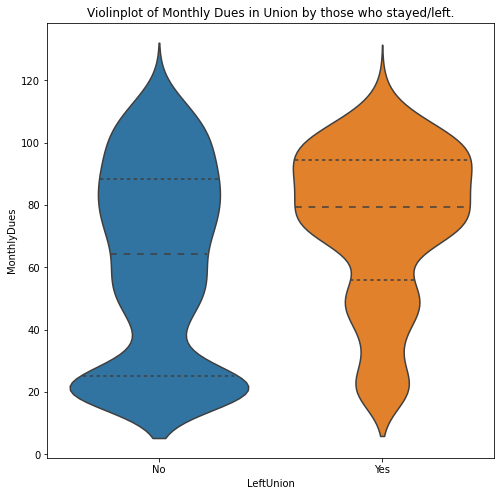

In [10]:
plt.figure(figsize=[8,8])
sns.violinplot(x='LeftUnion', y='MonthlyDues', data=uw, scale='width', inner='quartile')
#plt.ylim(0,50)
plt.title('Violinplot of Monthly Dues in Union by those who stayed/left.')
plt.show()

## 1.8 Dropping few outliers for scatter plot
### This is just for plot visibility. Outliers remain in for the models.

In [11]:
# Models got way worse so this was a bad idea.
uwDropOut = pd.DataFrame.copy(uw)
drop = uwDropOut[uwDropOut['MonthsInUnion'] > 100].index
uwDropOut.drop(drop, inplace=True)

## 1.81 Scatterplot of Months in Union by Monthly Dues, color coded by those who left the union.
### This conveys a similar message to the violin plot, but also shows that those who left were typically not in it for very long.

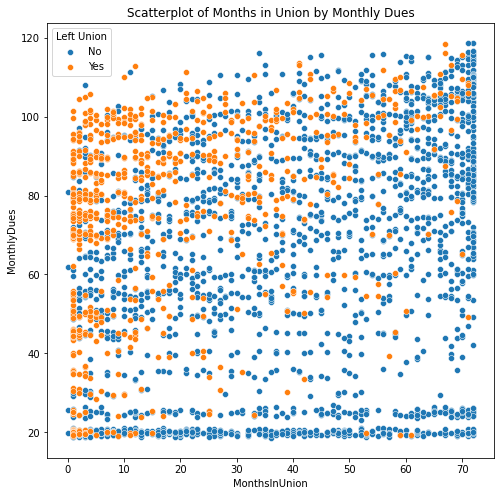

In [12]:
plt.figure(figsize=[8,8])

for i in list(uwDropOut['LeftUnion'].unique()):
    x = uwDropOut[uwDropOut['LeftUnion']== i]['MonthsInUnion']
    y = uwDropOut[uwDropOut['LeftUnion']== i]['MonthlyDues']
    sns.scatterplot(x=x,y=y, data=uwDropOut, label=i)
plt.title('Scatterplot of Months in Union by Monthly Dues')
plt.legend(title='Left Union')
plt.show()

## 1.99 Saving Cleaned Data

In [13]:
uw.to_csv('Justin-CleanedData.csv', index=False)

# 2.0 Converting Data <a name="2"></a>

## 2.1 Get a list of categorical and numeric variables

In [14]:
col = list(uw.columns)
catv = []
numv = []
numvcol = []

for i in col:
    if uw.dtypes[i] == object:
        catv.append(i)
    elif str(uw.dtypes[i]) in ['int64','float64']:
            numv.append(i)
            numvcol.append(i)

print(f'The categorical variables are:\t{catv}\n')
print(f'The numeric variables are:\t{numv}')

The categorical variables are:	['gender', 'USAcitizen', 'Married', 'ContinuingEd', 'StateOfResidence', 'Connectivity', 'FeatureA', 'FeatureB', 'FeatureC', 'FeatureD', 'FeatureE', 'FeatureF', 'DuesFrequency', 'PaperlessBilling', 'PaymentMethod', 'LeftUnion']

The numeric variables are:	['Management', 'MonthsInUnion', 'MonthlyDues', 'TotalDues']


## 2.2 List out how many unique values each categorical column has.

In [15]:
for i in catv:
    print(f'{i} has {uw[i].nunique()} unique values.')

gender has 2 unique values.
USAcitizen has 2 unique values.
Married has 2 unique values.
ContinuingEd has 2 unique values.
StateOfResidence has 2 unique values.
Connectivity has 3 unique values.
FeatureA has 3 unique values.
FeatureB has 3 unique values.
FeatureC has 3 unique values.
FeatureD has 3 unique values.
FeatureE has 3 unique values.
FeatureF has 3 unique values.
DuesFrequency has 3 unique values.
PaperlessBilling has 2 unique values.
PaymentMethod has 4 unique values.
LeftUnion has 2 unique values.


## 2.3 Convert these unique values into dummy variables using N-1 approach

In [16]:
uw = pd.get_dummies(uw, columns=catv, prefix_sep='_', drop_first=True)
uw.head(5)

,Management,MonthsInUnion,MonthlyDues,TotalDues,gender_Male,USAcitizen_Yes,Married_Yes,ContinuingEd_Yes,StateOfResidence_MO,Connectivity_Fiber optic,...,FeatureE_Yes,FeatureF_No,FeatureF_Yes,DuesFrequency_One year,DuesFrequency_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,LeftUnion_Yes
ID,,,,,,,,,,,,,,,,,,,,,
Justin1-14602,0,35,20.10,644.50,0,0,1,1,1,0,...,0,0,0,1,0,1,1,0,0,0
Justin2-14367,0,3,25.00,78.25,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
Justin3-13512,0,5,67.95,350.30,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
Justin4-19444,0,32,80.35,2596.15,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
Justin5-16483,0,17,55.50,934.15,1,0,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0


## 2.99 Save numeric data

In [17]:
uw.to_csv('JustinCleanedAndNumeric.csv', index=False)

# 3.0 PCA! <a name="3"></a>

## 3.1 Separate independent and dependent variable and scale X

In [18]:
X = uw.iloc[:,:-1]
y = uw.iloc[:,-1]

scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

print(X.shape)
print(y.shape)

(2999, 29)
(2999,)


## 3.2 Running PCA

In [19]:
pca = decomposition.PCA(n_components=len(X.columns))
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)

## 3.3 Show the amount of influence each feature has on each component

In [20]:
labels=['PC' + str(i) for i in range(0,(x_pca.shape[1]))]

comp = pd.DataFrame(pca.components_,columns=X.columns,index=list(labels))
componentsT = comp.sort_values(by =labels, axis=1,ascending=False).round(decimals=6).T
components = componentsT.reindex(componentsT.PC0.abs().sort_values(ascending=False).index)
components

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
MonthlyDues,0.406708,0.084051,-0.032082,0.016489,-0.132379,-0.027805,0.005248,-0.159285,-0.007235,-0.095704,...,-0.042741,-0.010246,0.050972,0.854507,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000
Connectivity_No,-0.374903,0.093884,-0.244481,0.172564,0.019927,-0.018598,0.037173,0.016805,-0.030574,-0.008316,...,0.014778,0.015135,-0.025267,0.163390,0.637519,-0.137067,0.240642,-0.024028,0.446988,0.009187
Connectivity_Fiber optic,0.314207,-0.055809,-0.163768,0.202510,-0.111648,0.020848,0.041044,-0.138310,-0.042424,-0.069787,...,-0.196291,-0.018531,0.062077,-0.351502,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000
FeatureF_Yes,0.259490,0.178144,-0.203290,-0.248503,-0.003438,-0.006824,-0.058456,0.040669,0.082936,-0.105058,...,0.033166,0.002617,0.025066,-0.137988,-0.071124,-0.271513,-0.036666,0.463280,0.362420,-0.126600
FeatureE_Yes,0.259149,0.184938,-0.202185,-0.213380,-0.033697,0.007675,-0.092528,0.055832,0.144741,-0.073773,...,0.031048,0.010639,0.026941,-0.137885,0.034837,-0.234450,0.551550,-0.161222,-0.127117,-0.191723
FeatureA_No,0.229412,-0.238625,-0.156057,-0.061159,0.117843,0.046433,-0.040997,0.345439,0.060896,0.007539,...,-0.069596,-0.007792,0.000606,-0.041628,0.336479,0.532023,0.113098,0.241411,-0.042396,-0.127220
PaymentMethod_Mailed check,-0.215185,-0.030764,0.007159,-0.072820,0.042626,-0.074421,0.059200,-0.309769,0.355988,-0.015768,...,0.164678,-0.555675,0.031827,0.000184,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
FeatureD_No,0.206650,-0.278746,-0.036556,0.157709,0.126548,0.134659,-0.161869,-0.087380,-0.111272,0.236809,...,-0.089474,-0.019059,-0.001979,-0.040913,0.031478,0.025470,0.150605,-0.061952,0.182139,0.648297
PaperlessBilling_Yes,0.200406,-0.053419,-0.043696,0.042158,-0.044922,-0.065146,-0.032041,0.143540,-0.003894,-0.042304,...,-0.066293,-0.034718,-0.001505,0.000624,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000
StateOfResidence_MO,-0.200295,-0.120849,0.081391,-0.276672,0.171435,-0.038767,-0.148180,0.121677,0.121461,0.081931,...,-0.121039,0.020790,-0.006165,0.070274,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000


## 3.4 Cumulative total for variance

In [21]:
cumVar = 0
for i in range(0,len(labels)):
    var = pca.explained_variance_ratio_[i]
    cumVar += var
    print(f'PC{i:02} explains {100*var:.2f}% for a cumulative total of {100*cumVar:.2f}%')

PC00 explains 18.16% for a cumulative total of 18.16%
PC01 explains 15.33% for a cumulative total of 33.48%
PC02 explains 8.00% for a cumulative total of 41.48%
PC03 explains 5.57% for a cumulative total of 47.05%
PC04 explains 4.68% for a cumulative total of 51.73%
PC05 explains 4.57% for a cumulative total of 56.31%
PC06 explains 4.43% for a cumulative total of 60.74%
PC07 explains 4.17% for a cumulative total of 64.91%
PC08 explains 4.11% for a cumulative total of 69.02%
PC09 explains 3.98% for a cumulative total of 73.00%
PC10 explains 3.77% for a cumulative total of 76.77%
PC11 explains 3.47% for a cumulative total of 80.24%
PC12 explains 3.41% for a cumulative total of 83.65%
PC13 explains 3.10% for a cumulative total of 86.75%
PC14 explains 3.05% for a cumulative total of 89.80%
PC15 explains 2.72% for a cumulative total of 92.53%
PC16 explains 2.11% for a cumulative total of 94.63%
PC17 explains 1.61% for a cumulative total of 96.25%
PC18 explains 1.39% for a cumulative total o

## 3.5 Screeeeee Plots AKA Dave's Dope Diagrams

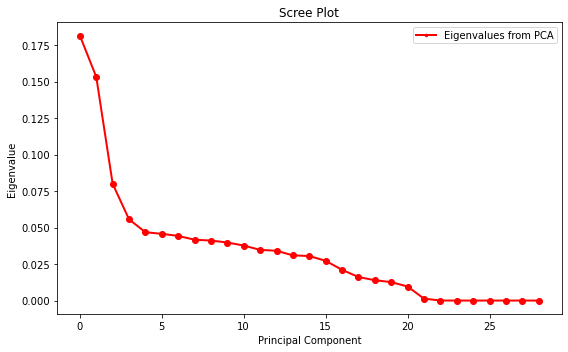

In [22]:
plt.figure(figsize=(8,5))
plt.plot(range(0,len(labels)), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, markerscale=0.4,
                 shadow=False)
plt.tight_layout()
plt.show()

## 3.51 Cumulative Scree Graph

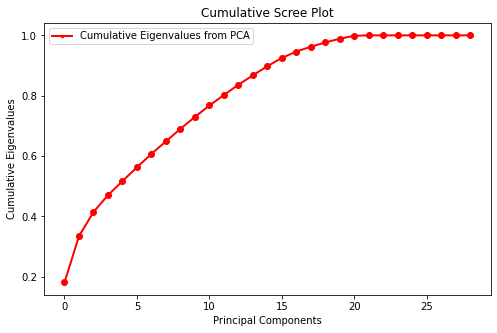

In [23]:
cumEigens=[]
cum = 0
for e in pca.explained_variance_ratio_:
        cum +=e
        cumEigens.append(cum)


plt.figure(figsize=(8,5))
plt.plot(range(0,len(labels)), cumEigens, 'ro-', linewidth=2)
plt.title('Cumulative Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Eigenvalues')
leg = plt.legend(['Cumulative Eigenvalues from PCA'], loc='best', borderpad=0.3, markerscale=0.4,
                 shadow=False)
plt.show()

## 3.6 Relationship between first two Principal Components

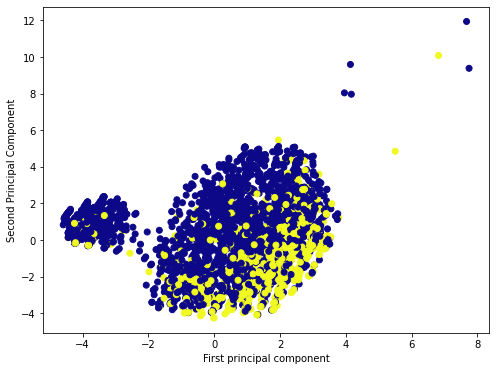

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=uw['LeftUnion_Yes'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

In [25]:
x_pca = pd.DataFrame(x_pca)

In [26]:
pc5 = x_pca.iloc[:,:5]
pc10 = x_pca.iloc[:,:10]
pc15 = x_pca.iloc[:,:15]
pc20 = x_pca.iloc[:,:20]

# 4.0 Setting up Train and Test Data <a name="4"></a>

## 4.1 Check dataset balance

In [27]:
uw.LeftUnion_Yes.value_counts(normalize=True)

0    0.732244
1    0.267756
Name: LeftUnion_Yes, dtype: float64

## 4.2 Split and normalize the data using 10 principal components

In [28]:
#X_train, X_hold, y_train, y_hold = train_test_split(pc10, y, test_size=0.3, random_state=1, stratify=y)
#X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.5, random_state=1, stratify=y_hold)

X_train, X_test, y_train, y_test = train_test_split(pc10, y, test_size=0.3, random_state=1, stratify=y)


#x = uw.values
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#X_test = scaler.transform(X_test)
#uw = pd.DataFrame(x_scaled, columns = uw.columns, index = uw.index)
X_train

array([[ 0.54644242, -0.56177349, -0.15685619, ...,  0.73076657,
         1.31514635, -0.77367056],
       [ 0.73218357,  0.45336548,  0.01007472, ...,  0.6608633 ,
        -2.27304286, -0.03744249],
       [-1.48364378,  0.7740574 , -0.66514502, ...,  0.36276891,
         0.01823407,  0.65818645],
       ...,
       [ 0.15604744,  1.30371431,  0.64674318, ...,  0.63982284,
         1.95548085, -0.06531052],
       [-0.2766065 , -0.55479529,  1.15693717, ..., -0.51950927,
         1.13381135, -2.02887494],
       [-1.4655104 ,  1.11557384, -0.34862956, ...,  1.24675857,
        -1.30628814,  0.02130234]])

# 5.0 Models <a name="5"></a>

In [29]:
models = []
train_acc = []
test_acc = []

scores = pd.DataFrame(columns = ['Model','Training Accuracy','Test Accuracy'])

## 5.1 Logistic Regression

In [30]:
lgr = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial', penalty='none')
lgr.fit(X_train,y_train)

name = 'Logistic Regression'
tscore = round(lgr.score(X_train,y_train),4)
vscore = round(lgr.score(X_test,y_test),4)

models.append(name)
train_acc.append(tscore)
test_acc.append(vscore)

print(f'Training Accuracy:\t{tscore}')
print(f'Test Accuracy:\t\t{vscore}')

Training Accuracy:	0.7937
Test Accuracy:		0.8111


## 5.2 Random Forest

In [31]:
rf_train_acc = []
rf_test_acc = []
depth_range = range(2,20)

for i in depth_range:
    np.random.seed(1)
    
    temp_forest = RandomForestClassifier(max_depth=i, n_estimators=100)
    temp_forest.fit(X_train,y_train)
    
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    rf_test_acc.append(temp_forest.score(X_test, y_test))
    
rf_idx = np.argmax(rf_test_acc)
rf_opt_depth = depth_range[rf_idx]


name = 'Random Forest'
tscore = round(rf_train_acc[rf_idx],4)
vscore = round(rf_test_acc[rf_idx],4)

models.append(name)
train_acc.append(tscore)
test_acc.append(vscore)

print(f'Optimal value for max_depth:\t\t{rf_opt_depth}')
print(f'Training Accuracy for Optimal Model:\t{rf_train_acc[rf_idx]:.4f}')
print(f'Test Accuracy for Optimal Model:\t{rf_test_acc[rf_idx]:.4f}')

Optimal value for max_depth:		7
Training Accuracy for Optimal Model:	0.8614
Test Accuracy for Optimal Model:	0.8089


## 5.3 Neural Network

In [32]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3,6), random_state=1, max_iter=1000)
clf.fit(X_train, y_train)


name = 'Neural Network'
tscore = round(clf.score(X_train, y_train),4)
vscore = round(clf.score(X_test, y_test),4)

models.append(name)
train_acc.append(tscore)
test_acc.append(vscore)

print(f'Training Accuracy:\t{tscore}')
print(f'Test Accuracy:\t\t{vscore}')

Training Accuracy:	0.7956
Test Accuracy:		0.8222


### 5.31 Loop I built to check for the best hidden_layer_sizes. Commented out as it takes 6ish minutes to try values 1-10 (100 total runs) on my desktop, but that's how I picked the above values. This was before I remembered GridSearchCV

In [33]:
#nn_train_acc = []
#nn_test_acc = []
#params = []
#test_range = range(1,11)
#
#for i in test_range:
#    for j in test_range:
#        
#        np.random.seed(1)
#        
#        temp_neural = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(i,j), random_state=1, max_iter=1000)
#        temp_neural.fit(X_train, y_train)
#        
#        nn_train_acc.append(temp_neural.score(X_train, y_train))
#        nn_test_acc.append(temp_neural.score(X_test, y_test))
#        params.append([i,j])
#    
#neural_idx = np.argmax(nn_test_acc)
#opt_params = params[neural_idx]
#
#print(f'Optimal Hidden Layer Sizes: {opt_params}')
#print(f'Training Accuracy for Optimal Model:\t{nn_train_acc[neural_idx]:.4f}')
#print(f'Test Accuracy for Optimal Model:\t{nn_test_acc[neural_idx]:.4f}')

Optimal Hidden Layer Sizes: [3, 6]
Training Accuracy for Optimal Model:	0.7956
Test Accuracy for Optimal Model:	0.8222


## 5.4 Support Vector Classification

In [34]:
svc = SVC()
svc.fit(X_train, y_train)


name = 'Support Vector Classification'
tscore = round(svc.score(X_train, y_train),4)
vscore = round(svc.score(X_test,y_test),4)

models.append(name)
train_acc.append(tscore)
test_acc.append(vscore)

print(f'Training Accuracy:\t{tscore}')
print(f'Test Accuracy:\t\t{vscore}')

Training Accuracy:	0.8142
Test Accuracy:		0.7956


## 5.5 XGBoost

### 5.51 Use GridSearchCV to find optimal parameters.

In [35]:
#param_grid = {
#    'max_depth': [3,4,5],
#    'learning_rate': [0.1,0.05,0.01],
#    'gamma': [0,0.25,1],
#    'reg_lambda': [0,1.0,10.0],
#    'scale_pos_weight':[1,3,5]
#}

param_grid = {
    'max_depth': range(0,10),
    'learning_rate': [0.1,0.5,1.0],
    'gamma': [0.25],
    'reg_lambda': [100,50,30],
    'scale_pos_weight':[3]
}

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                               subsample=0.9,
                               colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs=10,
    cv=10)

optimal_params.fit(X_train, y_train, verbose=False, early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test, y_test)])

print(optimal_params.best_params_)

{'gamma': 0.25, 'learning_rate': 0.5, 'max_depth': 3, 'reg_lambda': 50, 'scale_pos_weight': 3}


C:\Users\Justin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### 5.52 Use parameters from above

In [36]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            missing=None,
                            seed=42,
                            gamma=0.25,
                            learning_rate=0.5,
                            max_depth=3,
                            reg_lambda=50,
                            scale_pos_weight=3)

clf_xgb.fit(X_train,
            y_train,
            verbose=False,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

name = 'XGB Classifier'
tscore = round(svc.score(X_train, y_train),4)
vscore = round(svc.score(X_test,y_test),4)

models.append(name)
train_acc.append(tscore)
test_acc.append(vscore)

print(f'Training Accuracy:\t{tscore}')
print(f'Test Accuracy:\t\t{vscore}')

Training Accuracy:	0.8142
Test Accuracy:		0.7956


### 5.53 Confusion Matrix on results

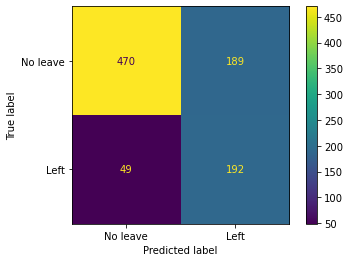

In [37]:
plot_confusion_matrix(clf_xgb, X_test, y_test, values_format='d', display_labels=['No leave','Left'])

### 5.54 XGBoost DMatrix from Dave's Example
This is what won't let me run more than once, so I didn't do much optimization here

In [38]:
train_xgb = xgb.DMatrix(X_train, y_train)
test_xgb = xgb.DMatrix(X_test, y_test)
param = {
    'max_depth':30,
    'eta':0.03,
    'objective':'multi:softmax',
    'num_class':2
}

xgb = xgb.train(param, train_xgb, 50)

train_pred = xgb.predict(train_xgb)
test_pred = xgb.predict(test_xgb)

name = 'XGB DMatrix'
tscore = round(accuracy_score(y_train, train_pred),4)
vscore = round(accuracy_score(y_test, test_pred),4)

models.append(name)
train_acc.append(tscore)
test_acc.append(vscore)

print(f'Training Accuracy:\t{tscore}')
print(f'Test Accuracy:\t\t{vscore}')

[20:52:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:	0.9929
Test Accuracy:		0.7744


## 6.0 Model Comparison <a name="6"></a>
### Create DataFrame and compare predictive accuracies.

In [39]:
array = np.array([models,train_acc,test_acc]).T
scores = pd.DataFrame(array, columns = ['Model','Train Accuracy','Test Accuracy'])

In [40]:
scores.sort_values(by='Test Accuracy', ascending=False)

,Model,Train Accuracy,Test Accuracy
2,Neural Network,0.7956,0.8222
0,Logistic Regression,0.7937,0.8111
1,Random Forest,0.8614,0.8089
3,Support Vector Classification,0.8142,0.7956
4,XGB Classifier,0.8142,0.7956
5,XGB DMatrix,0.9929,0.7744


## 7.0 Question Responses <a name="7"></a>

### 7.1 Comparing your results, to that of a blind guess, explain why you think the results differed?

A blind guess would be correct about half the time. The results of these models differ from that because they look at the various features and build an algorithm in an attempt to find a pattern. This algorithm is then used to predict the results of future data.
The results differed because a predictive algorithm is better than a blind guess. Most of the time.

### 7.2 Describe how you would improve your project if you had more time?

I would (and will) do a couple of different things. First I would do more research into how people clean their data. I played around with this a bit, but everything I tried (dropping some columns, dealing with outliers, etc.) only made the models worse. Nevertheless I feel like there's room to improve on that front.

The other thing I would do is learn more about each of these models and how to tune them properly. I know I've left a lot of performance on the table with most of these, but I'm not sure how to get there quite yet. I started messing around with GridSearchCV right at the end, so I'll probably start there.

I'll likely also try my hand at TensorFlow and see how that compares to the rest of these.